# Import Libraries

In [2]:
pip install --upgrade nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
#from keras.layers import Input, Embedding, LSTM, Dense
#from keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2024-03-25 09:44:58.833750: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 09:44:58.833892: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 09:44:58.990791: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# EDA

In [4]:
column_names = ["target", "id", "date", "flag", "user", "text"]

# Read the CSV file with specified column names
df = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", 
                 encoding="ISO-8859-1", names=column_names)

In [5]:
df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
# selecting target and features
data = df[["target","text"]]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [8]:
data.shape

(1600000, 2)

In [9]:
target_df = data['target'].value_counts().reset_index()

In [10]:
target_df

,target,count
0,0,800000
1,4,800000


In [11]:
fig = px.pie(target_df, values='count', names='target',title='Target Distribution')
fig.show()

## making 1 for positive instead of 4

In [12]:
data['target'][data['target']==4]=1

## Making Text Lowercase

In [13]:
data['text']=data['text'].str.lower()

In [14]:
stopwords_list = stopwords.words('english')

In [15]:
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Removing stop words

In [16]:
STOPWORDS = set(stopwords_list)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [17]:
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))

In [18]:
data['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    upset can't update facebook texting it... migh...
2    @kenichan dived many times ball. managed save ...
3                     whole body feels itchy like fire
4    @nationwideclass no, behaving all. i'm mad. he...
Name: text, dtype: object

## Removing Emails

In [19]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [20]:
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].head()

0      http://twitpic.com/2y1zl - awww, that's bumm...
1    upset can't update facebook texting it... migh...
2      dived many times ball. managed save 50% rest...
3                     whole body feels itchy like fire
4      no, behaving all. i'm mad. here? can't see t...
Name: text, dtype: object

## Removing URLs

In [21]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [22]:
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].head()

0        - awww, that's bummer. shoulda got david c...
1    upset can't update facebook texting it... migh...
2      dived many times ball. managed save 50% rest...
3                     whole body feels itchy like fire
4      no, behaving all. i'm mad. here? can't see t...
Name: text, dtype: object

## Removing punctuations

In [23]:
english_punctuations = string.punctuation
english_punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def cleaning_punctuations(text):
    translator = str.maketrans('', '', english_punctuations)
    return text.translate(translator)

In [25]:
data['text'] = data['text'].apply(lambda text: cleaning_punctuations(text))

In [26]:
data['text'].head()

0         awww thats bummer shoulda got david carr ...
1    upset cant update facebook texting it might cr...
2      dived many times ball managed save 50 rest g...
3                     whole body feels itchy like fire
4           no behaving all im mad here cant see there
Name: text, dtype: object

# Removing Numbers

In [27]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [28]:
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].head()

0         awww thats bummer shoulda got david carr ...
1    upset cant update facebook texting it might cr...
2      dived many times ball managed save  rest go ...
3                     whole body feels itchy like fire
4           no behaving all im mad here cant see there
Name: text, dtype: object

## Applying tokenization

In [29]:
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)

In [30]:
data['text'].head()

0    [awww, thats, bummer, shoulda, got, david, car...
1    [upset, cant, update, facebook, texting, it, m...
2    [dived, many, times, ball, managed, save, rest...
3              [whole, body, feels, itchy, like, fire]
4    [no, behaving, all, im, mad, here, cant, see, ...
Name: text, dtype: object

## Applying lemmatizer

In [31]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatizer_on_text(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]
data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [32]:
data['text'].head()

0    [awww, thats, bummer, shoulda, got, david, car...
1    [upset, cant, update, facebook, texting, it, m...
2    [dived, many, time, ball, managed, save, rest,...
3               [whole, body, feel, itchy, like, fire]
4    [no, behaving, all, im, mad, here, cant, see, ...
Name: text, dtype: object

In [33]:
X=data.text
y=data.target

In [34]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [35]:
sequences_matrix.shape

(1600000, 500)

## split the data to 30% for train && 70% for train 

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=42,stratify=y)

In [37]:
# show the shape of data
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (1120000, 500)
Shape of X_test:  (480000, 500)


# LSTM model 

In [38]:
#Defined tensorflow_based_model function for training tenforflow based model
def tensorflow_based_model(): 
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(500,50)(inputs) 
    layer = LSTM(64)(layer) 
    layer = Dense(256,name='FC1')(layer) 
    layer = Activation('relu')(layer) 
    layer = Dropout(0.5)(layer) 
    layer = Dense(1,name='out_layer')(layer) 
    layer = Activation('sigmoid')(layer) 
    model = Model(inputs=inputs,outputs=layer) 
    return model 

In [39]:
 # Model compilation
model = tensorflow_based_model()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])  

In [40]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 500, 50)        │        25,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC1 (Dense)                     │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out_layer (Dense)               │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,337 (278.66 KB)

 Trainable params: 71,337 (278.66 KB)

 Non-trainable params: 0 (0.00 B)

## fitting the model 

In [41]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/6
12600/12600 ━━━━━━━━━━━━━━━━━━━━ 358s 28ms/step - accuracy: 0.7030 - loss: 0.5563 - val_accuracy: 0.7258 - val_loss: 0.5275
Epoch 2/6
12600/12600 ━━━━━━━━━━━━━━━━━━━━ 357s 28ms/step - accuracy: 0.7268 - loss: 0.5290 - val_accuracy: 0.7304 - val_loss: 0.5241
Epoch 3/6
12600/12600 ━━━━━━━━━━━━━━━━━━━━ 361s 29ms/step - accuracy: 0.7297 - loss: 0.5254 - val_accuracy: 0.7301 - val_loss: 0.5234
Epoch 4/6
12600/12600 ━━━━━━━━━━━━━━━━━━━━ 361s 29ms/step - accuracy: 0.7296 - loss: 0.5255 - val_accuracy: 0.7256 - val_loss: 0.5296
Epoch 5/6
12600/12600 ━━━━━━━━━━━━━━━━━━━━ 361s 29ms/step - accuracy: 0.7300 - loss: 0.5247 - val_accuracy: 0.7276 - val_loss: 0.5289
Epoch 6/6
12600/12600 ━━━━━━━━━━━━━━━━━━━━ 361s 29ms/step - accuracy: 0.7312 - loss: 0.5240 - val_accuracy: 0.7297 - val_loss: 0.5270
Training finished !!


# Model Evalution  

In [42]:
accr1 = model.evaluate(X_test,Y_test)

15000/15000 ━━━━━━━━━━━━━━━━━━━━ 144s 10ms/step - accuracy: 0.7299 - loss: 0.5277


In [43]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1]))

Test set
  Accuracy: 0.73


## Confusion matriex

In [44]:
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5) 

15000/15000 ━━━━━━━━━━━━━━━━━━━━ 117s 8ms/step


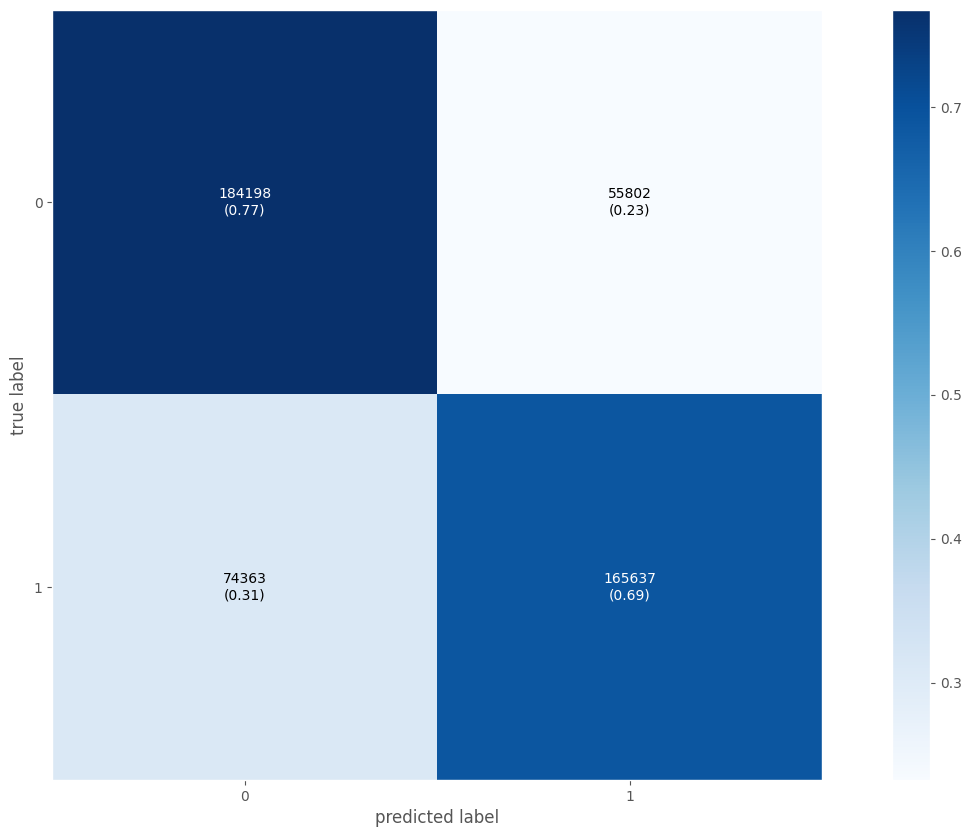

In [45]:
CR=confusion_matrix(Y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(18, 10),show_absolute=True,show_normed=True, colorbar=True)
plt.show();

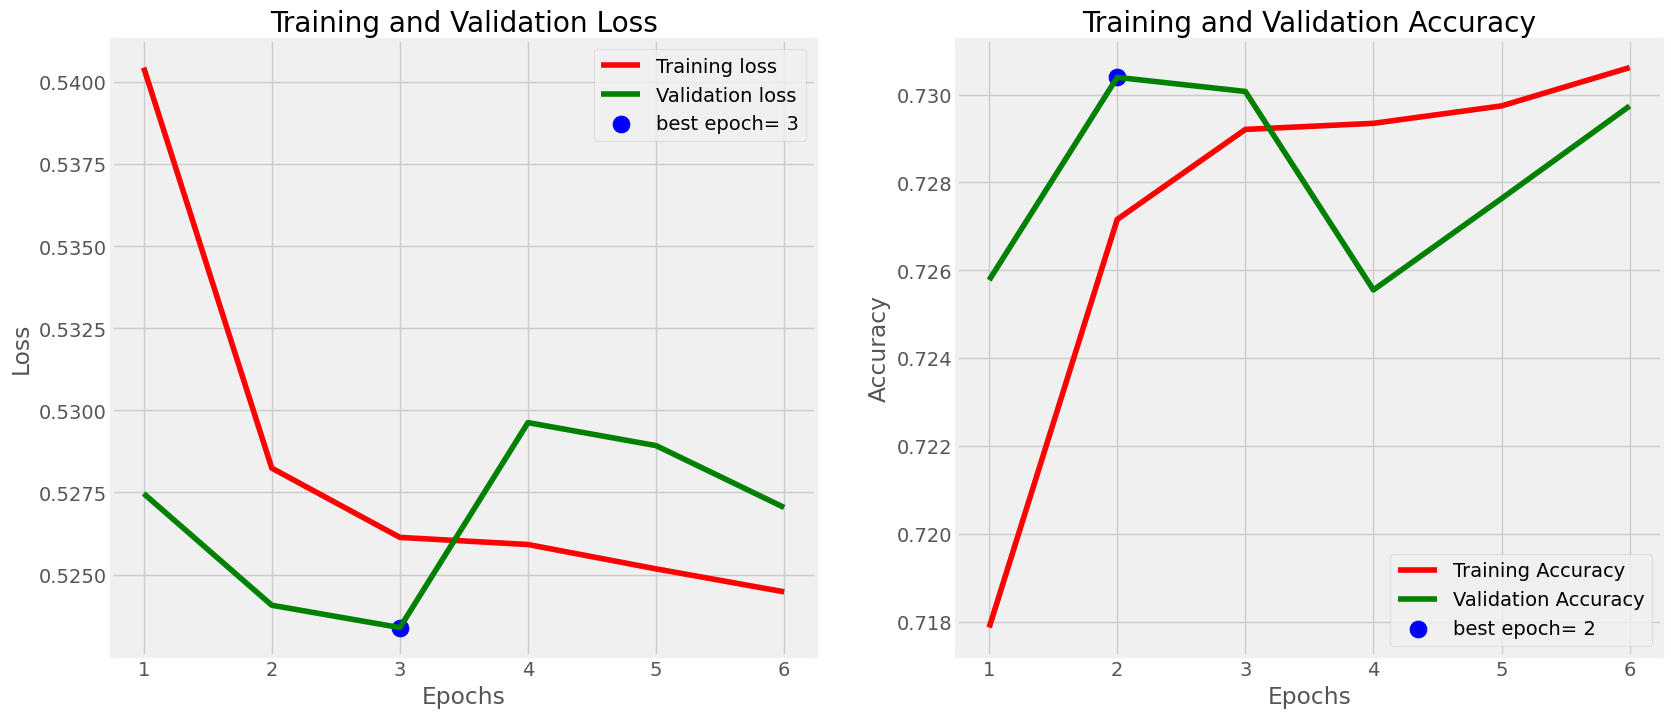

In [46]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [47]:
model.save('lstm_model.h5')


In [48]:
from keras.models import load_model
loaded_model = load_model('lstm_model.h5')

In [49]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [50]:
import pickle

In [51]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load Tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tok1 = pickle.load(handle)

In [52]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove email addresses
    text = re.sub('@[^\s]+', ' ', text)
    # Remove URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub('[0-9]+', '', text)
    # Tokenize
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Get user input
user_input = 'Try you should go outside and jump off the cliff'

# Preprocess user input and make prediction
preprocessed_text = preprocess_text(user_input)
sequence = tok1.texts_to_sequences([preprocessed_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = loaded_model.predict(padded_sequence)

# Display prediction result
if prediction > 0.5:
    print('Prediction: Not Hate Speech')
else:
    print('Prediction: Hate Speech')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Prediction: Hate Speech
